In [39]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import json
from datetime import datetime
import time

In [40]:
import models.graphene_thermodynamics_v2 as gt
from models.cooling_phonons_v3 import CoolingPhonons
from models.graphene_optics import GrapheneTHG

In [41]:
# # Prepare interpolation data for the calculation of chemical potentials.
# # This is done with better parameters in the notebook "01b_test_mu_interp2d".
# mm = gt.mu_func_use_2d_interpolation(dens_min=1.0e-5, dens_max=1.0, dens_num=30,
#                                      tempK_min=30.0, tempK_max=4000.0, tempK_num=40,
#                                      muMin=-4.0, muMax=2.0, proc_num=16,
#                                      save_to="mu_table.pkl")

In [42]:
# Load interpolation data for the calculation of chemical potentials.
mm = gt.mu_func_use_2d_interpolation(load_from="mu_table.pkl")

In [43]:
# Constant parameters of the functional dependence of the parameter Gamma
# (i.e. the single-electron scattering rate in the THG formula)
# Gamma = (a + c k_B * T_L) * e_F + b / e_F
# Obtained by a fit of no-pump measures, see notebooks 07x.
gammaParams = {
    "a": 0.704531,
    "b": 0.007437,
    "c": 0.001507
}

# Generate a list of parameters to parallelize the calculation.
sysparams = {
    "tempK_eq": 30.0,
    "tau_ph": 1200.0,
    "pu_fluenceSI": 0.0,
    "pu_dt": 50.0,
    "pu_eph": 1.200,
    "pr_fluenceSI": 11.0,  # ORIG: 110.0
    "pr_dt": 150.0,
    "pr_eph": 0.320,
    "nsub": 1.4,  # hBN encapsulated with SiO2 around
    "ntop": 1.4,
    "alpha_res": 1.0e-5,  # ORIG: 1.0e-3
    "dtdb": 45.0,  # ORIG: 200.0
    "ph_en_frac": 1.0,
    "dtdb_cutoff_dens": None,
    "pe_relax_rate": 1.0/10.0,
    "eF": 0.300,
    "pr_delay": 50.0
}

# Specific values of Gamma.
sysparams["gammaConst"] = 0.0
sysparams["gammaInv"] = gammaParams["b"]
sysparams["gammaProp"] = gammaParams["a"] + gammaParams["c"] * sysparams["tempK_eq"] / 11600.0

In [44]:
dyn = CoolingPhonons(**sysparams)

In [45]:
tmax = sysparams["pr_delay"] + sysparams["pr_dt"]
runparams = {
    "tmax": tmax,
    "tnum": 101,
    "dt_approx": 5.0,
    "print_time": True    
}

In [46]:
time1 = time.time()
dyn.run(**runparams)
time2 = time.time()
print("Elapsed: %d" % int(time2 - time1))

Using dt = 2.000 fs.
Done 10.
Done 20.
Done 30.
Done 40.
Done 50.
Done 60.
Done 70.
Done 80.
Done 90.
Done 100.
Elapsed: 34


In [30]:
gt._out_of_bounds_one

[[1.5311424682126403e-11, 30.000012958102225, -0.033348662642310956],
 [1.5311424682126403e-11, 40.000012958102225, -0.045785179501763196],
 [1.5311424682126403e-11, 15.000006479051113, -0.015251618931870325],
 [1.5311424682126403e-11, 22.50000971857667, -0.024172995768822148],
 [1.5311424682126403e-11, 37.50001619762778, -0.04265944004328048],
 [1.5311424682126403e-11, 45.00001943715334, -0.05205265409495041],
 [1.5311424682126403e-11, 30.000012958102225, -0.033348662642310956],
 [1.546053551050151e-11, 30.0000130783931, -0.03332488031992398],
 [1.546053551050151e-11, 30.0000130783931, -0.03332488031992398],
 [1.546053551050151e-11, 40.000013078393096, -0.045751760926577845],
 [1.546053551050151e-11, 15.00000653919655, -0.01523908696071885],
 [1.546053551050151e-11, 22.500009808794825, -0.02416026887476619],
 [1.546053551050151e-11, 37.50001634799138, -0.04263360167351493],
 [1.546053551050151e-11, 45.00001961758965, -0.052045510592506616],
 [1.546053551050151e-11, 30.0000130783931, -

In [31]:
gt._out_of_bounds_two

[]

In [47]:
# Prepare data for plotting.
tt = dyn.dynamics_m[:,0]
tempK_t = dyn.dynamics_m[:,1]
muC_t = dyn.dynamics_m[:,2]
muV_t = dyn.dynamics_m[:,3]
dnE_t = dyn.dynamics_m[:,4]
nG_t = dyn.dynamics_m[:,5]
nK_t = dyn.dynamics_m[:,6]

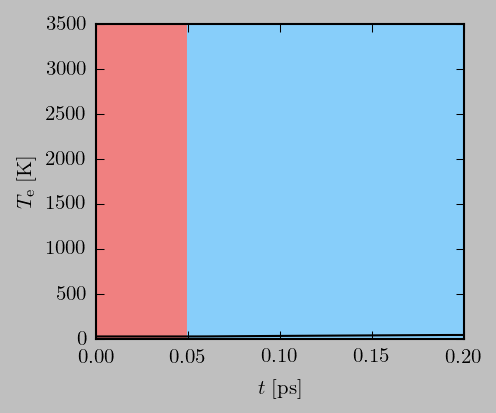

In [48]:
mpl.style.use(["classic", "latex"])
fig00 = plt.figure(figsize=(3.5,3.0), frameon=True, dpi=150)
plt.axes([0.2, 0.2, 0.7, 0.7])
plt.fill_between([0.0, sysparams["pu_dt"] * 1.0e-3], 4000, color="lightcoral")
plt.fill_between([sysparams["pr_delay"] * 1.0e-3, (sysparams["pr_delay"] + sysparams["pr_dt"]) * 1.0e-3], 4000, color="lightskyblue")
plt.plot(tt * 1.0e-3, tempK_t, "-k")
plt.xlim([0.0, tmax * 1.0e-3])
plt.ylim([0.0, 3500.0])
plt.xlabel(r"$t~[{\rm ps}]$")
plt.ylabel(r"$T_{\rm e}~[{\rm K}]$");

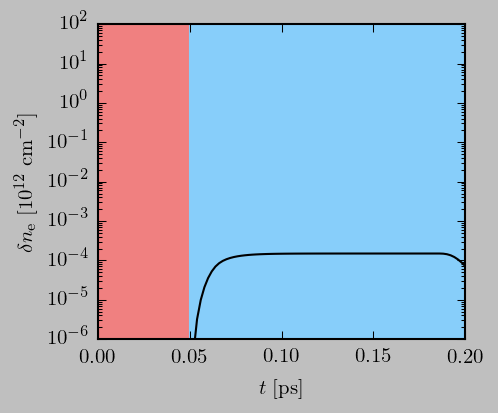

In [49]:
mpl.style.use(["classic", "latex"])
fig01 = plt.figure(figsize=(3.5,3.0), frameon=True, dpi=150)
plt.axes([0.2, 0.2, 0.7, 0.7])
plt.fill_between([0.0, sysparams["pu_dt"] * 1.0e-3], 4000, color="lightcoral")
plt.fill_between([sysparams["pr_delay"] * 1.0e-3, (sysparams["pr_delay"] + sysparams["pr_dt"]) * 1.0e-3], 4000, color="lightskyblue")
plt.plot(tt * 1.0e-3, dnE_t * 100.0, "-k")
plt.xlim([0.0, tmax * 1.0e-3])
plt.ylim([1.0e-6, 100.0])
plt.gca().set_yscale("log")
plt.xlabel(r"$t~[{\rm ps}]$")
plt.ylabel(r"$\delta n_{\rm e}~[10^{12}~{\rm cm}^{-2}]$");

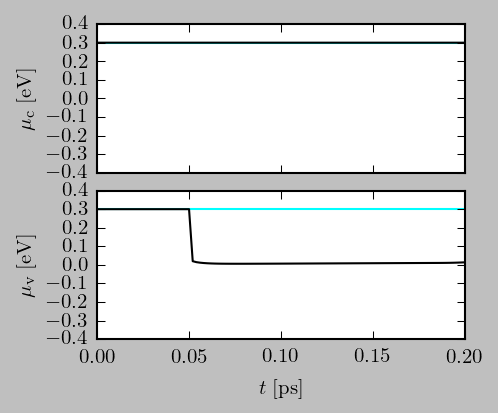

In [50]:
mpl.style.use(["classic", "latex"])
fig02 = plt.figure(figsize=(3.5,3.0), frameon=True, dpi=150)
plt.axes([0.2, 0.57, 0.7, 0.33])
plt.axhline(dyn.p["eF"], color="cyan")
plt.plot(tt * 1.0e-3, muC_t, "-k")
plt.xlim([0.0, tmax * 1.0e-3])
plt.ylim([-0.4, 0.4])
plt.gca().axes.xaxis.set_ticklabels([])
plt.ylabel(r"$\mu_{\rm c}~[{\rm eV}]$")
plt.axes([0.2, 0.2, 0.7, 0.33])
plt.axhline(dyn.p["eF"], color="cyan")
plt.plot(tt * 1.0e-3, muV_t, "-k")
plt.xlim([0.0, tmax * 1.0e-3])
plt.ylim([-0.4, 0.4])
plt.xlabel(r"$t~[{\rm ps}]$")
plt.ylabel(r"$\mu_{\rm v}~[{\rm eV}]$");

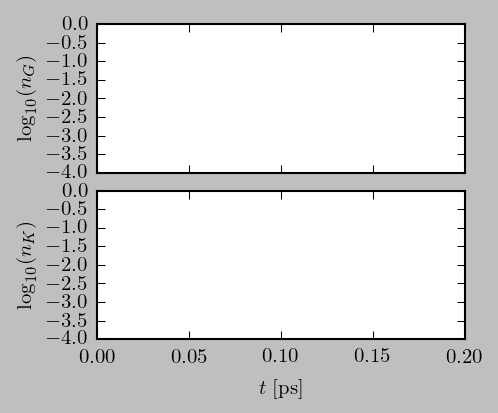

In [51]:
mpl.style.use(["classic", "latex"])
fig03 = plt.figure(figsize=(3.5,3.0), frameon=True, dpi=150)
plt.axes([0.2, 0.57, 0.7, 0.33])
plt.plot(tt * 1.0e-3, np.log10(nG_t), "-k")
plt.xlim([0.0, tmax * 1.0e-3])
plt.ylim([-4.0, 0.0])
plt.gca().axes.xaxis.set_ticklabels([])
plt.ylabel(r"$\log_{10}(n_{G})$")
plt.axes([0.2, 0.2, 0.7, 0.33])
plt.plot(tt * 1.0e-3, np.log10(nK_t), "-k")
plt.xlim([0.0, tmax * 1.0e-3])
plt.ylim([-4.0, 0.0])
plt.xlabel(r"$t~[{\rm ps}]$")
plt.ylabel(r"$\log_{10}(n_{K})$");

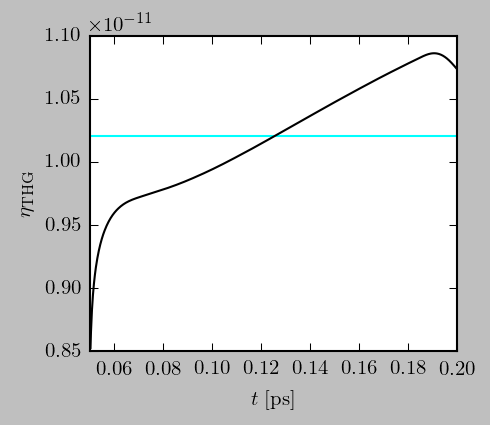

In [52]:
mpl.style.use(["classic", "latex"])
fig04 = plt.figure(figsize=(3.5,3.0), frameon=True, dpi=150)
plt.axes([0.2, 0.2, 0.7, 0.7])
plt.axhline(dyn.p["etaTHG_avg"], color="cyan")
plt.plot(dyn.p["pr_tt"] * 1.0e-3, dyn.p["etaTHG"], "-k")
plt.xlim([dyn.p["pr_delay"] * 1.0e-3, (dyn.p["pr_delay"] + dyn.p["pr_dt"]) * 1.0e-3])
#plt.ylim([0.0, 0.2e-8])
plt.xlabel(r"$t~[{\rm ps}]$")
plt.ylabel(r"$\eta_{\rm THG}$");

In [53]:
dyn.p["etaTHG_avg"]

1.0204052218644878e-11

In [ ]:
# Save results and plots.

run_label = "tune_params"
time_stamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
saveDir = "./data/01/%s_%s" % (time_stamp, run_label)
os.mkdir(saveDir)

with open("%s/params.json" % saveDir, "w") as f:
    json.dump({"sysparams": sysparams, "runparams": runparams}, f, indent=4)
np.savetxt("%s/dynamics.csv" % saveDir, dyn.dynamics_m, delimiter=",")
np.savetxt("%s/thg.csv" % saveDir, np.c_[dyn.p["pr_tt"],dyn.p["etaTHG"]], delimiter=",")

fig00.savefig("%s/plot_tempK.png" % saveDir, dpi=300)
fig01.savefig("%s/plot_dnE.png" % saveDir, dpi=300)
fig02.savefig("%s/plot_muC_muV.png" % saveDir, dpi=300)
fig03.savefig("%s/plot_nG_nK.png" % saveDir, dpi=300)
fig04.savefig("%s/plot_etaTHG.png" % saveDir, dpi=300)